In [1]:
import pandas as pd
df = pd.read_pickle('merged_exceptsub.pickle')

In [13]:
train, test = df[:350000], df[350000:]
X = train[['공휴일','주말제외공휴일','corona_stage','행정구역_확진자','전국_확진자','검색트랜드','평균하차수']]
y = train['하차']

In [28]:
X_test, y_test = test[['공휴일','주말제외공휴일','corona_stage','행정구역_확진자','전국_확진자','검색트랜드','평균하차수']], test['하차']

In [69]:
test[430:460]

,역명,date,시간,하차,승차,요일,공휴일,주말제외공휴일,corona_stage,구,행정구역_확진자,전국_확진자,검색트랜드,평균하차수
350430,제기동,2020-02-11,15-16,1360,1846,화요일,0,0,0,1,0,0.0,1.328130,1549.625
350431,제기동,2020-02-11,16-17,1203,1698,화요일,0,0,0,1,0,0.0,1.328130,1307.375
350432,제기동,2020-02-11,17-18,965,1609,화요일,0,0,0,1,0,0.0,1.328130,1006.000
350433,제기동,2020-02-11,18-19,1028,1837,화요일,0,0,0,1,0,0.0,1.328130,1100.375
350434,제기동,2020-02-11,19-20,774,839,화요일,0,0,0,1,0,0.0,1.328130,865.625
350435,제기동,2020-02-11,20-21,418,548,화요일,0,0,0,1,0,0.0,1.328130,486.875
350436,제기동,2020-02-11,21-22,373,424,화요일,0,0,0,1,0,0.0,1.328130,435.375
350437,제기동,2020-02-11,22-23,402,356,화요일,0,0,0,1,0,0.0,1.328130,400.375
350438,제기동,2020-02-11,23-24,198,149,화요일,0,0,0,1,0,0.0,1.328130,271.125
350439,제기동,2020-02-11,24-01,64,18,화요일,0,0,0,1,0,0.0,1.328130,95.500


In [15]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X= st.fit_transform(X)

In [29]:
X_test = st.transform(X_test)

In [37]:
from tensorflow.keras import models
from tensorflow.keras import layers


model = models.Sequential()
model.add(layers.Dense(10, activation='relu',
                   input_shape=(X.shape[1],)))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [41]:
model.fit(X, y, validation_data=(X_test,y_test), epochs=2, batch_size=000)

Epoch 1/2
10938/10938 [==============================] - 20s 2ms/step - loss: 77639.2969 - mae: 104.1464 - val_loss: 86071.7578 - val_mae: 124.5438
Epoch 2/2
10938/10938 [==============================] - 20s 2ms/step - loss: 76693.8438 - mae: 102.8075 - val_loss: 84467.7500 - val_mae: 121.6509


In [30]:
val_mse, val_mae = model.evaluate(X_test, y_test)

2125/2125 [==============================] - 2s 1ms/step - loss: 73633.2578 - mae: 105.0515


In [42]:
yhat = model.predict(X_test)

In [43]:
yhat

array([[ 44.255592],
       [411.15698 ],
       [907.42773 ],
       ...,
       [ 72.93061 ],
       [ 49.64073 ],
       [ 19.350824]], dtype=float32)

In [63]:
yy = y_test.reset_index()['하차'].tolist()

<function matplotlib.pyplot.show(*args, **kw)>

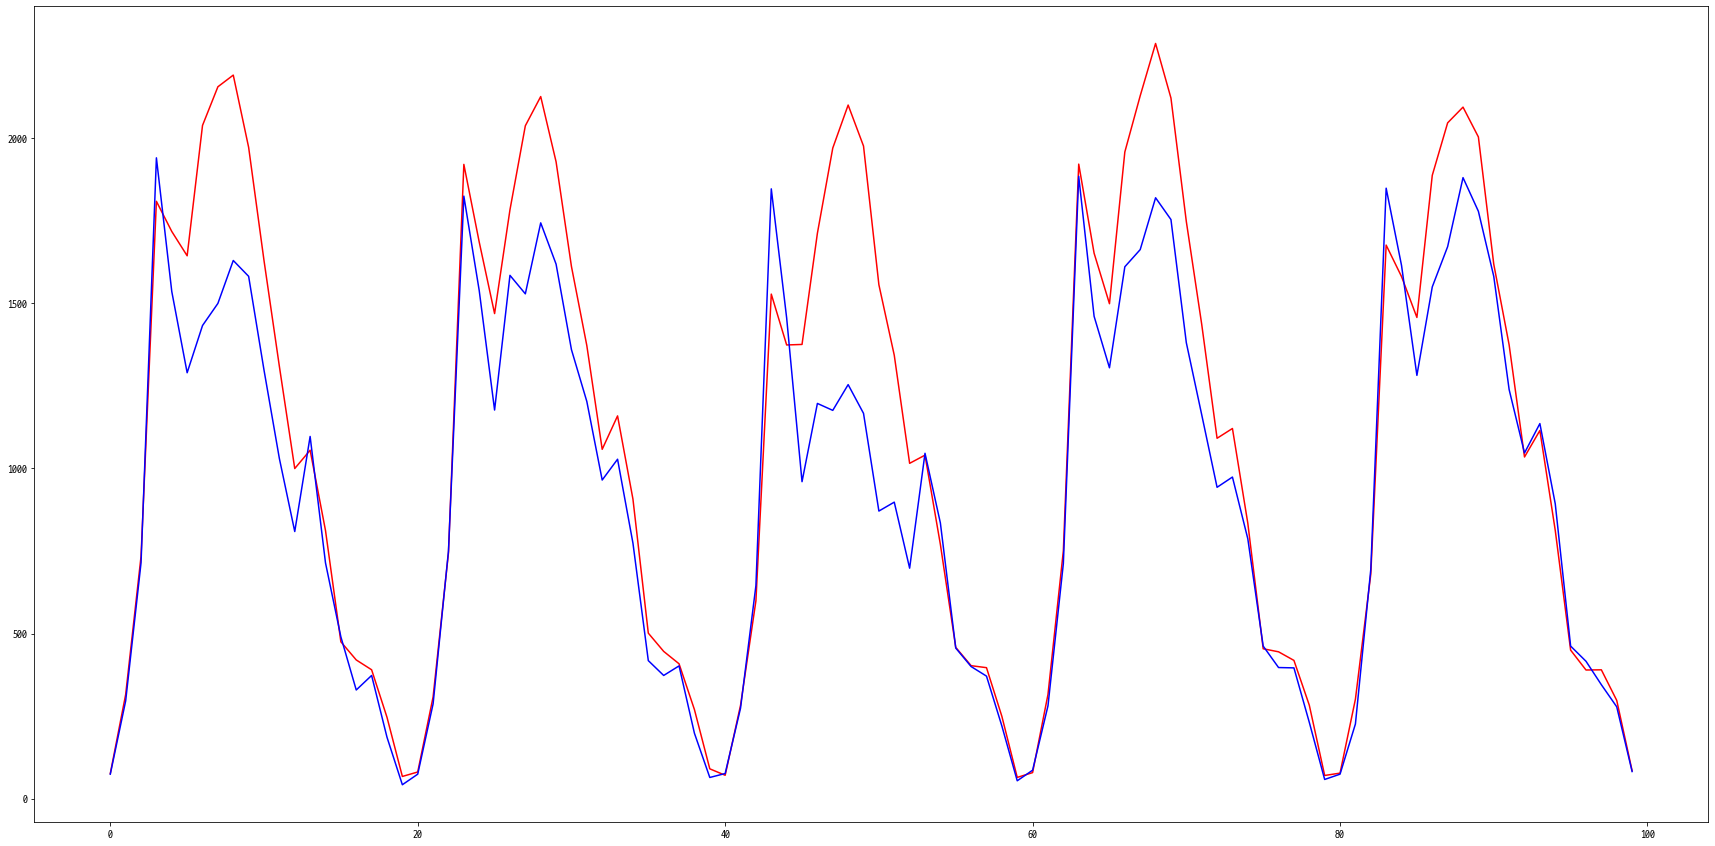

In [65]:
plt.figure(figsize=(30, 15))
plt.plot(yhat[400:500], c='r')
plt.plot(yy[400:500], c='b')
plt.show

In [1]:
import pandas as pd
df = pd.read_pickle('data/주거인구.pkl')

In [4]:
df

,기간,자치구,동,합계
0,2020.2/4,합계,합계,"9,720,846"
1,2020.2/4,종로구,소계,"150,383"
2,2020.2/4,종로구,사직동,"9,506"
3,2020.2/4,종로구,삼청동,"2,707"
4,2020.2/4,종로구,부암동,"10,050"
...,...,...,...,...
446,2020.2/4,강동구,둔촌1동,261
447,2020.2/4,강동구,둔촌2동,"27,152"
448,2020.2/4,강동구,암사1동,"35,931"
449,2020.2/4,강동구,천호2동,"34,853"


In [7]:
df[df['동']=='소계']

,기간,자치구,동,합계
1,2020.2/4,종로구,소계,"150,383"
19,2020.2/4,중구,소계,"126,092"
35,2020.2/4,용산구,소계,"229,431"
52,2020.2/4,성동구,소계,"297,397"
70,2020.2/4,광진구,소계,"349,574"
86,2020.2/4,동대문구,소계,"345,593"
101,2020.2/4,중랑구,소계,"394,414"
118,2020.2/4,성북구,소계,"441,812"
139,2020.2/4,강북구,소계,"311,773"
153,2020.2/4,도봉구,소계,"329,560"


In [8]:
df1= pd.read_csv('data/상권정보/20-2분기상가(상권)정보_서울_20200630.csv', delimiter='|')

In [9]:
df1

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19964615,석봉토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,1121510300100770047020647,NaN,"서울특별시 광진구 자양로39길 20, (구의동)",143200,4992.0,NaN,1,NaN,127.088387,37.549245
1,19977290,피자마루,약수점,Q,음식,Q07,패스트푸드,Q07A01,피자전문,I56192,...,1114016200103720095000001,현진빌딩,"서울특별시 중구 동호로7길 37, (신당동)",100450,4596.0,NaN,1,NaN,127.010861,37.552153
2,19979960,홍능갈비,NaN,Q,음식,Q01,한식,Q01A02,갈비/삼겹살,I56111,...,1150010300110860003013118,NaN,"서울특별시 강서구 화곡로18길 31, (화곡동)",157010,7718.0,NaN,1,NaN,126.836078,37.538927
3,19983535,초밥왕,NaN,Q,음식,Q03,일식/수산물,Q03A03,음식점-초밥전문,I56113,...,1171010200100070028000237,현대타워아파트,"서울특별시 송파구 올림픽로 293-19, (신천동, 현대타워아파트)",138735,5510.0,NaN,1,NaN,127.102490,37.515149
4,19969945,에브리돈,북가좌점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1141011900103070003002306,NaN,"서울특별시 서대문구 응암로 65, (북가좌동)",120130,3681.0,NaN,1,NaN,126.910288,37.579029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370316,16458448,행운수산,NaN,Q,음식,Q03,일식/수산물,Q03A02,음식점-일식,I56113,...,1141012000201240001000006,DMC파크뷰자이,"서울특별시 서대문구 가재울미래로 2, (남가좌동, DMC파크뷰자이아파트)",120121,3711.0,201,NaN,110,126.916677,37.574907
370317,16475509,T.O.Ppc방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,1156012700100230004022239,NaN,"서울특별시 영등포구 선유서로 117, (양평동3가)",150103,7269.0,NaN,1,B101,126.886101,37.526156
370318,16468028,철민사,NaN,D,소매,D05,의복의류,D05A06,맞춤양장/양장점,G47413,...,1114015300100190001013750,평화시장,"서울특별시 중구 청계천로 246, (방산동)",100811,4563.0,NaN,2,151,127.004702,37.569357
370319,16458247,창업마켓,NaN,F,생활서비스,F13,기타서비스업,F13A01,사업경영상담,M71531,...,1165010600100430012019672,씨티빌,"서울특별시 서초구 신반포로43길 44, (잠원동, 시티빌)",137906,6529.0,NaN,NaN,201,127.017681,37.511933


In [15]:
df2= pd.read_csv('data/상권정보/20-1분기상가업소정보_서울_202003.csv', delimiter='|' , encoding='utf-8', )

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 286982: invalid continuation byte